In [50]:
%load_ext autoreload
%autoreload 2

In [51]:
import pickle
import pandas as pd
import numpy as np
from mesh_import import mesh

In [3]:
bert = mesh.bert.BertService()

In [4]:
tokenizer = bert.tokenizer

In [6]:
bert.instance

In [11]:
tensor[0].shape

torch.Size([2, 9, 768])

In [12]:
enc_data

{'input_ids': [[101, 4376, 6691, 5952, 4460, 2253, 4388, 2146, 102], [101, 3762, 2149, 5817, 3191, 3460, 102, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 0, 0]]}

In [1]:
import torch

In [4]:
from transformers import DistilBertModel, DistilBertConfig, DistilBertTokenizer
from transformers import DistilBertForMaskedLM, DistilBertConfig

In [5]:
model_name = "distilbert-base-multilingual-cased"
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
tokenizer.encode("我不知道")

[101, 3976, 2080, 5817, 7761, 102]

In [6]:
config = DistilBertConfig.from_pretrained(model_name)

In [7]:
config.output_attentions = True

In [8]:
mlm = DistilBertForMaskedLM.from_pretrained(model_name, config=config)

In [9]:
ids1 = torch.tensor(tokenizer.encode("老師的椅子")).unsqueeze(0)

In [10]:
ids1

tensor([[ 101, 6455, 3618, 5718, 4647, 3350,  102]])

In [ ]:
from matplotlib import pyplot as plt
from itertools import chain

In [36]:
with torch.no_grad():
    predictions = mlm(ids1)
    
predictions[0].shape
indices = torch.topk(predictions[0], 5, axis=2)[1].squeeze().numpy()
for i in range(indices.shape[1]+1):
    print(tokenizer.decode([x for x in indices[i]]))

., ) - 。
老 教 師 小 大
師 师 家 老 者
的 們 ， 這 和
椅 桌 凳 車 兒
子 椅 車 頭 孩


In [99]:
ids2 = torch.tensor(tokenizer.encode("漂亮快樂的小孩")).unsqueeze(0)
with torch.no_grad():
    predictions = mlm(ids2)
predictions[0].shape

prob = F.softmax(predictions[0], dim=2)
logits = predictions[0]
prob_k, ind_k = torch.topk(logits, 5, axis=2)
prob_k = prob_k.squeeze().numpy()
ind_k = ind_k.squeeze().numpy()
for i in range(ind_k.shape[0]):
    for idx, p in zip(ind_k[i], prob_k[i]):
        # print(tokenizer.decode(int(idx)), p)
        print("%s(%.2f)" % (tokenizer.decode(int(idx)), p), end=' ')
    print()

.(6.36) ,(5.37) )(5.11) -(4.80) 。(4.58) 
漂(18.42) 亮(10.27) 光(8.59) 閃(8.17) 天(8.09) 
亮(21.37) 樂(11.47) 光(9.95) 快(9.46) 星(9.46) 
快(20.11) 歡(10.93) 的(10.66) 愛(10.55) 樂(10.12) 
樂(21.66) 亮(13.54) 乐(12.16) 愛(11.76) 快(11.62) 
的(20.16) 小(10.98) 這(10.93) 個(10.92) 是(10.71) 
小(22.39) 大(12.97) 孩(12.90) 女(11.84) 兒(11.52) 
孩(22.01) 兒(13.20) 小(11.54) 們(10.47) 子(9.75) 
。(8.41) 小(8.14) 的(7.83) 是(6.92) 孩(6.76) 


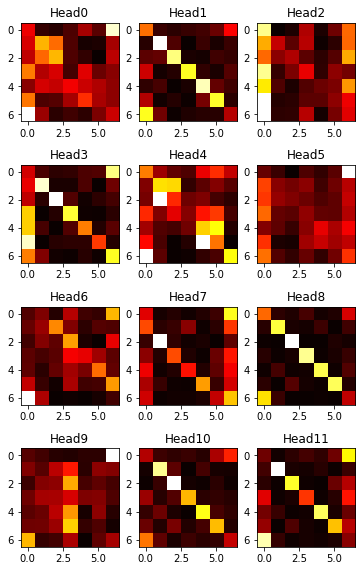

In [37]:
fig, axes = plt.subplots(4, 3, figsize=(6, 10))
last_att = predictions[1][-1]
h0 = last_att[0,1,:,:]
for ax_i, ax in enumerate(chain.from_iterable(axes)):
    ax.imshow(last_att[0,ax_i,:,:].detach().numpy(), cmap="hot")
    ax.set_title(f"Head{ax_i}")    

In [63]:
tokenizer.vocab.get("xcv", "<UNK>")

'<UNK>'

In [60]:
prob_sub.shape

torch.Size([1, 7, 4815])

In [40]:
len(tokenizer.vocab)

119547

In [52]:
vocab = mesh.deep.VocabZhTw()

In [71]:
tgt_idx, tw_idx = vocab.get_mapping(tokenizer.vocab)

In [54]:
len(vocab_map)

4815